In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
loan_data_defaults=pd.read_csv("Data/loan_data_defaults.csv")
loan_data_defaults.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,...,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,good_bad,recovery rate,CCF,recovery rate_0_1
0,1,1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,...,0,0,0,0,1,0,0,0.046832,0.817416,1
1,8,8,8,1071795,1306957,5600,5600,5600.0,60 months,21.28,...,0,0,0,0,1,0,0,0.033761,0.971068,1
2,9,9,9,1071570,1306721,5375,5375,5350.0,60 months,12.69,...,0,0,0,0,1,0,0,0.050100,0.874701,1
3,12,12,12,1064687,1298717,9000,9000,9000.0,36 months,13.49,...,0,0,0,0,1,0,0,0.049367,0.860429,1
4,14,14,14,1069057,1303503,10000,10000,10000.0,36 months,10.65,...,0,0,0,0,1,0,0,0.064510,0.456653,1


(array([  20.,   60.,   29.,   97.,   70.,   84.,  150.,   78.,  124.,
         170.,  152.,  208.,  199.,  228.,  242.,  276.,  300.,  335.,
         339.,  376.,  412.,  421.,  505.,  505.,  575.,  583.,  614.,
         735.,  756.,  812.,  840.,  942.,  959., 1137., 1217., 1418.,
        1431., 1580., 1732., 1850., 2003., 2151., 2123., 2376., 2447.,
        2693., 2366., 2115., 1527.,  874.]),
 array([4.3800000e-04, 2.0429240e-02, 4.0420480e-02, 6.0411720e-02,
        8.0402960e-02, 1.0039420e-01, 1.2038544e-01, 1.4037668e-01,
        1.6036792e-01, 1.8035916e-01, 2.0035040e-01, 2.2034164e-01,
        2.4033288e-01, 2.6032412e-01, 2.8031536e-01, 3.0030660e-01,
        3.2029784e-01, 3.4028908e-01, 3.6028032e-01, 3.8027156e-01,
        4.0026280e-01, 4.2025404e-01, 4.4024528e-01, 4.6023652e-01,
        4.8022776e-01, 5.0021900e-01, 5.2021024e-01, 5.4020148e-01,
        5.6019272e-01, 5.8018396e-01, 6.0017520e-01, 6.2016644e-01,
        6.4015768e-01, 6.6014892e-01, 6.8014016e-01, 7.0

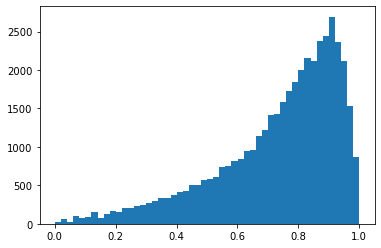

In [5]:
#for ead model i will consider CCF as a target variable 
plt.hist(loan_data_defaults['CCF'],bins=50)

In [6]:
loan_data_defaults['recovery rate_0_1']=np.where(loan_data_defaults['recovery rate']==0,0,1)

In [7]:
ead_inputs_train,ead_inputs_test,ead_targets_train,ead_targets_test= train_test_split(loan_data_defaults.drop(['good_bad','recovery rate','recovery rate_0_1','CCF'],axis=1),loan_data_defaults['CCF'],test_size=0.2,random_state=272)


In [8]:
features_all= ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [9]:
features_reference_cat=['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [10]:
#we have to only use features all
ead_inputs_train=ead_inputs_train[features_all]
ead_inputs_train=ead_inputs_train.drop(features_reference_cat,axis=1)

In [16]:
reg_ead=LinearRegression()
reg_ead.fit(ead_inputs_train,ead_targets_train)

LinearRegression()

In [17]:
features_name=ead_inputs_train.columns.values

In [19]:
summary_table= pd.DataFrame(columns=['Feature name'],data=features_name)
summary_table['Coefficients']= np.transpose(reg_ead.coef_)
summary_table.index= summary_table.index+1
summary_table.loc[0]=['Intercept',reg_ead.intercept_]
summary_table=summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,1.116708e+00
1,grade:A,-3.019738e-01
2,grade:B,-2.368378e-01
3,grade:C,-1.700195e-01
4,grade:D,-1.196305e-01
5,grade:E,-6.627469e-02
6,grade:F,-1.905834e-02
7,home_ownership:MORTGAGE,-5.172037e-03
8,home_ownership:NONE,7.121542e-02
9,home_ownership:OTHER,-1.000122e-03


In [20]:
# As we know that positive coefficients= increase in the CCF
# Negative coefficients = Decrease in the CCF

## Model Validation


In [21]:
ead_inputs_test = ead_inputs_test[features_all]
ead_inputs_test = ead_inputs_test.drop(features_reference_cat,axis=1)

In [22]:
y_hat_test_ead= reg_ead.predict(ead_inputs_test)

In [25]:
corr=pd.concat([ead_targets_test.reset_index(drop=True),pd.DataFrame(y_hat_test_ead)],axis=1).corr()
corr

,CCF,0
CCF,1.000000,0.518711
0,0.518711,1.000000


In [26]:
#it means that correlation between actual and predicted is strong positive then its
#means that the ead model is good.


<AxesSubplot:xlabel='CCF', ylabel='Density'>

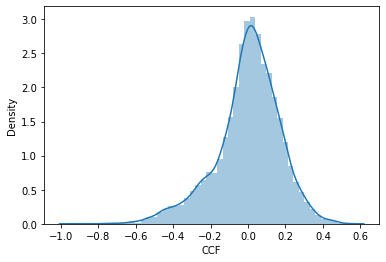

In [27]:
#distribution of residuals
sns.distplot(ead_targets_test-y_hat_test_ead)

In [28]:
#We can see distribution is symmetric about 0 and follow normal distribution 
# which implies that its a good models and preserve assumptions of Linear Regression

In [29]:
#basic statistics of predicted values
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736586
std,0.104647
min,0.357914
25%,0.661329
50%,0.732043
75%,0.812172
max,1.008137


In [30]:
# we see predicted value greater than 1 because the linear regression 
#model is not constrained to produce predicted values in [0,1].

In [31]:
# we will assign 0 those are <0 and will assign 1 those are >1.
y_hat_test_ead = np.where(y_hat_test_ead<0,0,y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead>1,1,y_hat_test_ead)

In [32]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736584
std,0.104643
min,0.357914
25%,0.661329
50%,0.732043
75%,0.812172
max,1.000000


In [33]:
# now all the values are in interval [0,1].

In [36]:
#save the model into pickle file to use in future
pickle.dump(reg_ead,open("ead_model.sav","wb"))